In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import seaborn as sns

signal1 = np.loadtxt('data/heart1.txt')
signal2 = np.loadtxt('data/heart2.txt')

In [2]:
print(signal1, signal2)

[-0.206875 -0.20875  -0.2125   ...  0.395     0.386875  0.380625] [0.236875 0.251875 0.26625  ... 1.4125   1.41375  1.41437 ]


In [3]:
print(signal1.size / 250 / 60, signal2.size / 250 / 60)

10.0624 10.0624


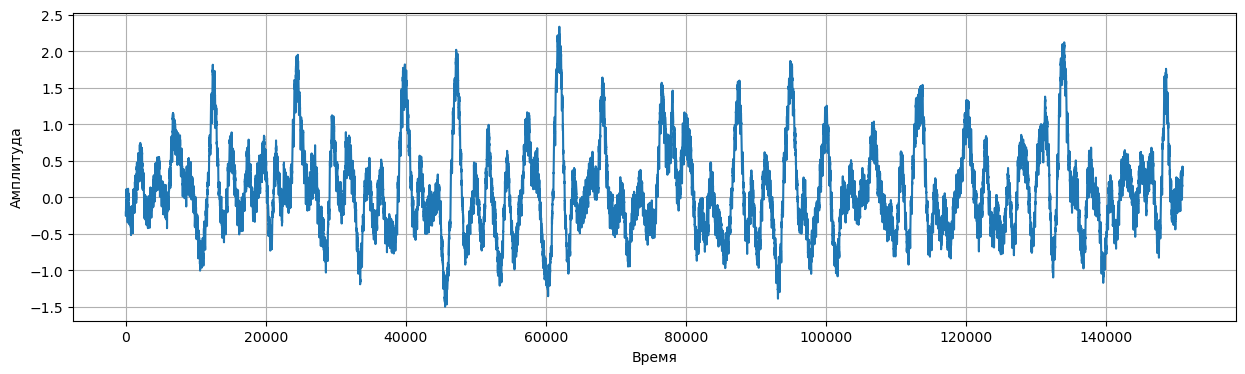

In [4]:
plt.figure(figsize=(15, 4))
plt.xlabel('Время')
plt.ylabel('Амплитуда')
plt.grid(True)

plt.plot(signal1)
plt.show()

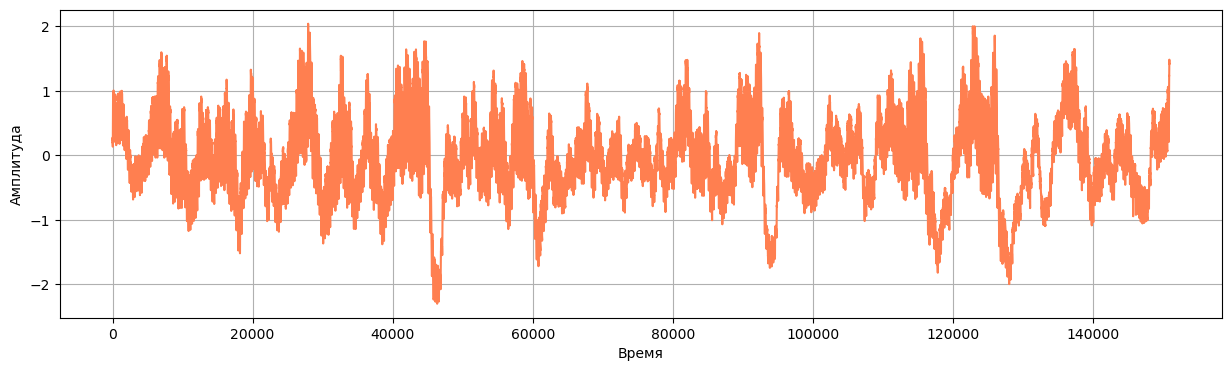

In [5]:
plt.figure(figsize=(15, 4))
plt.xlabel('Время')
plt.ylabel('Амплитуда')
plt.grid(True)

plt.plot(signal2, color='coral')
plt.show()

In [6]:
signal_size = signal1.size

In [7]:
# кол-во измерений за секунду (Гц)
signal_frequency = 250
# время за которое произошло одно измерение
period = 1/signal_frequency 
# временной промежуток в две минуты
shifts = 2 * 60
# количество измерений за две минуты
count_in_shift = shifts / period

In [11]:
result_correlate = np.correlate(signal1, signal2, "full")
best_correlation = np.max(result_correlate)
best_shift = np.argmax(result_correlate)

In [12]:
print(result_correlate)
print(best_correlation)
print(best_shift)

[-0.29259779 -0.58771927 -0.88788488 ...  0.29235117  0.18751094
  0.09016055]
17069.23358944463
149739


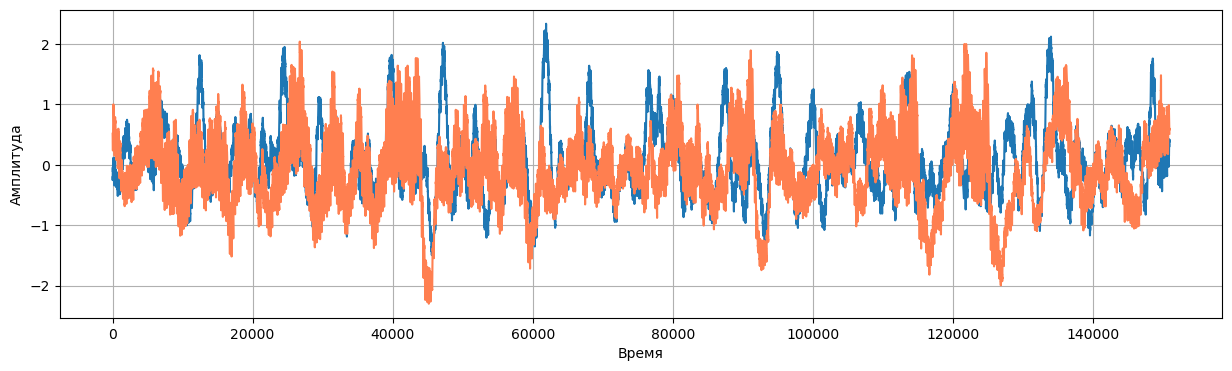

In [13]:
plt.figure(figsize=(15, 4))
plt.xlabel('Время')
plt.ylabel('Амплитуда')
plt.grid(True)

time_start = np.arange(len(signal1))
signal2_rolled = np.roll(signal2, best_shift)

plt.plot(time_start, signal1)
plt.plot(time_start, signal2_rolled, color='coral')
plt.show()

In [27]:
best_correlation = -np.inf

In [28]:
for shift in range(int(-count_in_shift), int(count_in_shift)):
    shifted_signal2 = np.roll(signal2, shift) # циклически сдвигаю
    corr = np.correlate(signal1, shifted_signal2)
    if corr > best_correlation:
        best_correlation = corr
        best_shift = shift

In [29]:
print("Наилучшая корреляция:", best_correlation)
print("Лучший сдвиг:", best_shift)

Наилучшая корреляция: [17098.20021562]
Лучший сдвиг: -1196


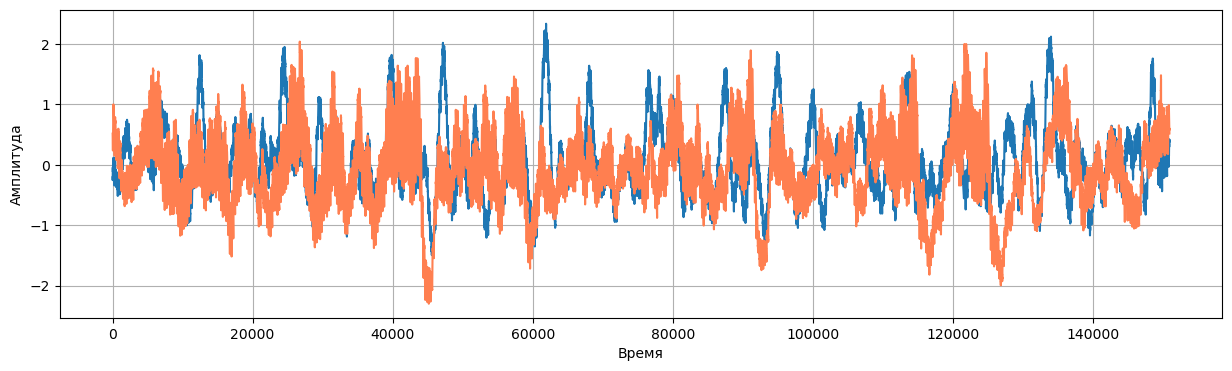

In [30]:
plt.figure(figsize=(15, 4))
plt.xlabel('Время')
plt.ylabel('Амплитуда')
plt.grid(True)

time_start = np.arange(len(signal1))
signal2_rolled = np.roll(signal2, best_shift)

plt.plot(time_start, signal1)
plt.plot(time_start, signal2_rolled, color='coral')
plt.show()